<a href="https://colab.research.google.com/github/sumaiya008/Car-Detection-and-Speed-Calculation-in-Traffic-Videos/blob/main/1_0_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure
# from google.colab.patches import cv2_imshow

In [ ]:
# from google.colab import drive

# drive.mount('/content/drive')


In [2]:
# Path to the directory containing images
# image_dir = '/content/drive/MyDrive/CV_Project/Car_data/train/images/'
image_dir = '/Users/analeegraig/Documents/Computer Vision/final_project_data/train/images'

# List to store resized images
resized_images = []

# Desired width for resizing
new_width = 1280

# Loop through each image in the directory
for filename in os.listdir(image_dir):
    if filename.endswith(('.jpg', '.jpeg', '.png')):  # Ensure only image files are considered
        # Construct the full path to the image
        image_path = os.path.join(image_dir, filename)

        # Load the image
        image = cv2.imread(image_path)

        # Get original dimensions
        original_height, original_width, _ = image.shape

        # Calculate the aspect ratio
        ratio = new_width / original_width

        # Calculate the new height based on the aspect ratio
        new_height = int(original_height * ratio)

        # Resize the image while maintaining the aspect ratio
        resized_image = cv2.resize(image, (new_width, new_height))

        # Append the resized image to the list
        resized_images.append(resized_image)

# Convert the list of images to a NumPy array
images = np.array(resized_images)

# Check the shape of the resulting array
print("Shape of the images array:", images.shape)


Shape of the images array: (399, 720, 1280, 3)


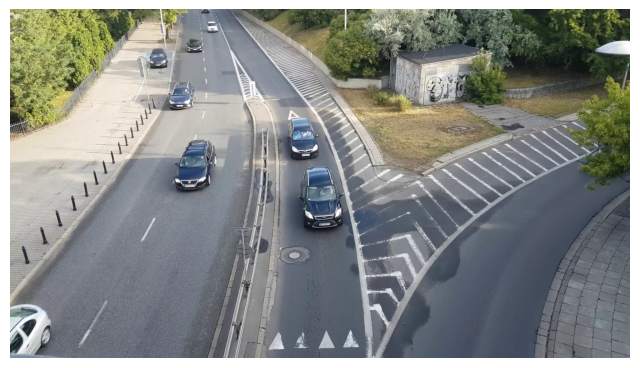

In [3]:
# Plot images
for i in range(min(1, images.shape[0])):
    plt.figure(figsize=(8, 8))
    plt.imshow(np.flip(images[i], axis=-1))
    plt.axis('off')
    plt.show()

In [4]:
# Normalize the images
normalized_images = images.astype('float32') / 255.0

# Check the shape of the resulting array
print("Shape of the normalized images array:", normalized_images.shape)

Shape of the normalized images array: (399, 720, 1280, 3)


In [5]:
normalized_images[1]

array([[[0.3137255 , 0.6313726 , 0.61960787],
        [0.28235295, 0.5921569 , 0.5803922 ],
        [0.32156864, 0.6313726 , 0.61960787],
        ...,
        [0.14509805, 0.14901961, 0.13333334],
        [0.12941177, 0.13333334, 0.11764706],
        [0.11764706, 0.12156863, 0.10588235]],

       [[0.41960785, 0.7176471 , 0.70980394],
        [0.3647059 , 0.6627451 , 0.654902  ],
        [0.27450982, 0.57254905, 0.5647059 ],
        ...,
        [0.13725491, 0.14117648, 0.1254902 ],
        [0.1254902 , 0.12941177, 0.11372549],
        [0.11372549, 0.11764706, 0.10196079]],

       [[0.3529412 , 0.6431373 , 0.63529414],
        [0.32156864, 0.60784316, 0.6       ],
        [0.2509804 , 0.5411765 , 0.53333336],
        ...,
        [0.1254902 , 0.12941177, 0.11372549],
        [0.11764706, 0.12156863, 0.10588235],
        [0.11372549, 0.11764706, 0.10196079]],

       ...,

       [[0.62352943, 0.5411765 , 0.4862745 ],
        [0.62352943, 0.54509807, 0.4862745 ],
        [0.6392157 , 0

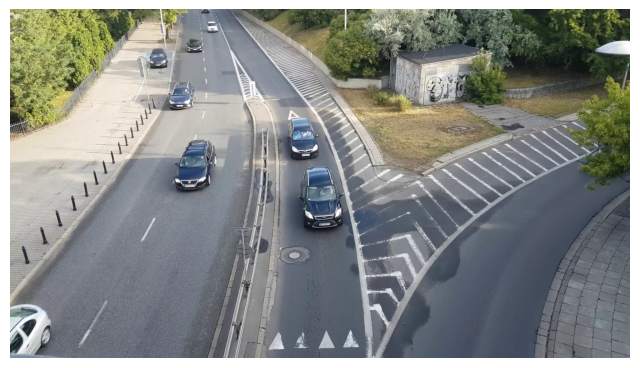

In [6]:
# Plot normalized images
for i in range(min(1, normalized_images.shape[0])):
    plt.figure(figsize=(8, 8))
    plt.imshow(np.flip(normalized_images[i], axis=-1))
    plt.axis('off')
    plt.show()

Shape of the grayscale images array: (399, 720, 1280, 1)


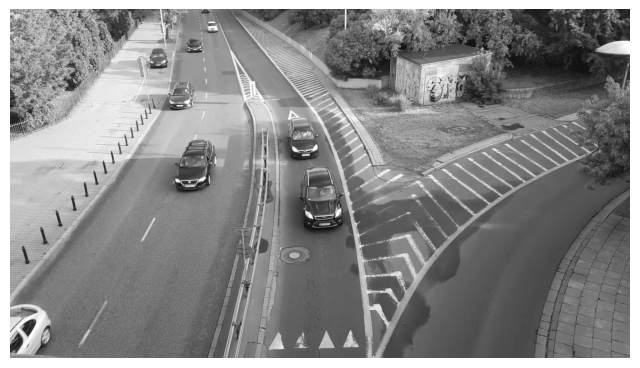

In [7]:
# Convert normalized images to grayscale
gray_images = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in normalized_images])

# Add a channel dimension to the grayscale images
gray_images = gray_images.reshape(gray_images.shape + (1,))

# Check the shape of the resulting array
print("Shape of the grayscale images array:", gray_images.shape)

# Plot grayscale images
for i in range(min(1, gray_images.shape[0])):
    plt.figure(figsize=(8, 8))
    plt.imshow(np.squeeze(gray_images[i]), cmap='gray')
    plt.axis('off')
    plt.show()


Shape of the enhanced images array: (399, 720, 1280)


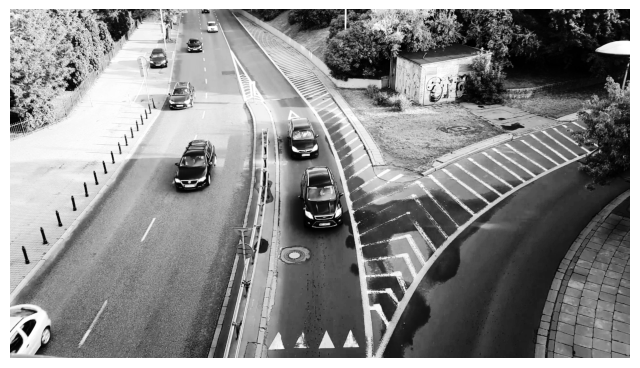

In [8]:
# Convert the grayscale images to uint8 type
gray_images_uint8 = (gray_images * 255).astype(np.uint8)

# Apply contrast enhancement (histogram equalization) to grayscale images
enhanced_images = np.array([cv2.equalizeHist(img) for img in gray_images_uint8])

# Check the shape of the resulting array
print("Shape of the enhanced images array:", enhanced_images.shape)

# Plot enhanced images
for i in range(min(1, enhanced_images.shape[0])):
    plt.figure(figsize=(8, 8))
    plt.imshow(np.squeeze(enhanced_images[i]), cmap='gray')
    plt.axis('off')
    plt.show()


In [9]:
enhanced_images[1]

array([[187, 173, 189, ...,   5,   4,   3],
       [210, 198, 165, ...,   5,   4,   3],
       [192, 181, 150, ...,   4,   3,   3],
       ...,
       [165, 165, 171, ..., 130, 132, 127],
       [167, 167, 168, ..., 130, 132, 127],
       [168, 167, 167, ..., 127, 132, 125]], dtype=uint8)

Shape of the Canny edge images array: (399, 720, 1280)


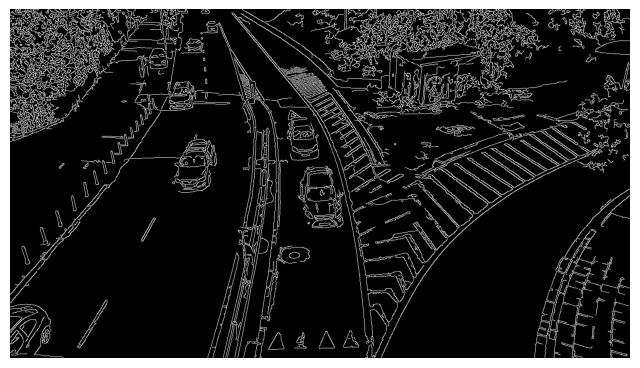

In [10]:
# Apply noise reduction (Gaussian blur) to enhanced images
blurred_images = np.array([cv2.GaussianBlur(img, (5, 5), 0) for img in gray_images])

# Convert blurred images to uint8 data type
blurred_images_uint8 = (blurred_images * 255).astype(np.uint8)

# Apply Canny edge detection to blurred images
canny_images = np.array([cv2.Canny(img, 50, 150) for img in blurred_images_uint8])

# Check the shape of the resulting array
print("Shape of the Canny edge images array:", canny_images.shape)

# Plot Canny edge images
for i in range(min(1, canny_images.shape[0])):
    plt.figure(figsize=(8, 8))
    plt.imshow(np.squeeze(canny_images[i]), cmap='gray')
    plt.axis('off')
    plt.show()

In [11]:
# Function to extract spatial features using contour detection
def extract_spatial_features(images):
    spatial_features = []

    for image in images:
        # Find contours in the Canny edge-detected image
        contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Extract spatial features from contours (e.g., area, perimeter)
        features = []
        for contour in contours:
            # Calculate the area and perimeter of the contour
            area = cv2.contourArea(contour)
            perimeter = cv2.arcLength(contour, closed=True)

            # Add the area and perimeter to the feature list
            features.extend([area, perimeter])

        # Append spatial features to the list
        spatial_features.append(features)

    return np.array(spatial_features)

# Extract spatial features using contour detection on Canny edge-detected images
spatial_features = extract_spatial_features(canny_images)

# Check the shape of the resulting spatial features array
print("Shape of the spatial features array:", spatial_features.shape)


Shape of the spatial features array: (399,)


/var/folders/w3/x0690xnx12bcnwv0x7n6s4q00000gn/T/ipykernel_1188/923682527.py:22: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(spatial_features)


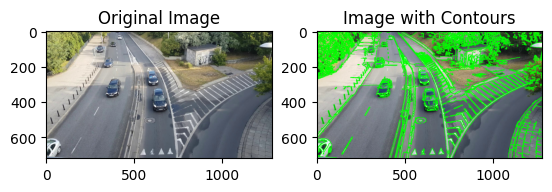

In [12]:
import matplotlib.pyplot as plt

# Choose an index for the image you want to visualize
image_index = 0

# Get the original image
original_image = images[image_index]

# Get the corresponding Canny edge-detected image
canny_image = canny_images[image_index]

# Find contours in the Canny edge-detected image
contours, _ = cv2.findContours(canny_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
image_with_contours = original_image.copy()
cv2.drawContours(image_with_contours, contours, -1, (0, 255, 0), 2)  # Draw in green

# Display the original image and the image with contours
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_with_contours, cv2.COLOR_BGR2RGB))
plt.title('Image with Contours')

plt.show()

In [13]:
# Apply HOG feature extraction to enhanced images
hog_features = []

for img in enhanced_images:
    # Calculate HOG features
    features, hog_image = hog(img, orientations=8, pixels_per_cell=(8, 8), cells_per_block=(1, 1), visualize=True)

    # Rescale HOG features for better visualization
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    # Append HOG features to the list
    hog_features.append(hog_image_rescaled)

# Convert the list of HOG features to a NumPy array
hog_features_array = np.array(hog_features)



In [ ]:
# Check the shape of the resulting array
print("Shape of the HOG features array:", hog_features_array.shape)

# Plot HOG features
for i in range(min(1, hog_features_array.shape[0])):
    plt.figure(figsize=(8, 8))
    plt.imshow(np.squeeze(hog_features_array[i]), cmap='gray')
    plt.axis('off')
    plt.show()


## Extracting color histrogram

In [ ]:
# Function to extract color histograms and reduce dimensionality if needed
def extract_and_reduce_histograms(images, num_bins=256, reduce_dim=False):
    histograms = []

    for image in images:
        # Convert the image to HSV color space
        hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

        # Calculate the histogram for each channel (Hue, Saturation, Value)
        hist_hue = cv2.calcHist([hsv_image], [0], None, [num_bins], [0, 256])
        hist_saturation = cv2.calcHist([hsv_image], [1], None, [num_bins], [0, 256])
        hist_value = cv2.calcHist([hsv_image], [2], None, [num_bins], [0, 256])

        # Flatten the histograms to 1D arrays
        hist_hue = hist_hue.flatten()
        hist_saturation = hist_saturation.flatten()
        hist_value = hist_value.flatten()

        # Concatenate the histograms for each channel
        histogram = np.concatenate((hist_hue, hist_saturation, hist_value))

        # Normalize the histogram
        histogram /= np.sum(histogram)

        # Optionally reduce dimensionality using techniques like histogram equalization
        if reduce_dim:
            equalized_image = cv2.equalizeHist(hsv_image[:, :, 0])  # Apply to the intensity channel (H)
            equalized_histogram = cv2.calcHist([equalized_image], [0], None, [num_bins], [0, 256])
            equalized_histogram = equalized_histogram.flatten()
            equalized_histogram /= np.sum(equalized_histogram)
            histograms.append(equalized_histogram)
        else:
            histograms.append(histogram)

    return np.array(histograms)


In [ ]:
# Extract color histograms and reduce dimensionality if needed
histograms = extract_and_reduce_histograms(normalized_images)

# Check the shape of the resulting histogram array
print("Shape of the histograms array:", histograms.shape)

# Visualize a histogram (optional)
plt.plot(histograms[0])
plt.title('Color Histogram')
plt.show()

In [ ]:
from skimage.exposure import rescale_intensity

def extract_hog_features(images):
    hog_features = []

    for image in images:
        # Convert the image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Extract HOG features
        features, hog_image = hog(gray_image, orientations=9, pixels_per_cell=(8, 8),
                                  cells_per_block=(2, 2), visualize=True, multichannel=False)

        # Rescale HOG features for better visualization
        hog_image_rescaled = rescale_intensity(hog_image, in_range=(0, 10))  # Adjust the range as needed

        # Append HOG features to the list
        hog_features.append(hog_image_rescaled)

    return np.array(hog_features)

In [ ]:
hog_features = extract_hog_features(normalized_images)

# Check the shape of the resulting HOG features array
print("Shape of the HOG features array:", hog_features.shape)


In [ ]:
# Save HOG features to a file
save_path = '/content/drive/MyDrive/CV_Project/Car_data/hog_features.npy'
np.save(save_path, hog_features)

# Print a message indicating the successful save
print("HOG features saved successfully at:", save_path)


In [ ]:
# Choose an index for the image you want to visualize
image_index = 0

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(images[image_index], cv2.COLOR_BGR2RGB))
plt.title('Original Image')

# Display the rescaled HOG features image
plt.subplot(1, 2, 2)
plt.imshow(hog_features[image_index])
plt.title('Rescaled HOG Features')

# Show the plot
plt.show()

In [ ]:
# Convert normalized images to grayscale
gray_images = np.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in normalized_images])

# Add a channel dimension to the grayscale images
gray_images = gray_images.reshape(gray_images.shape + (1,))

# Check the shape of the resulting array
print("Shape of the grayscale images array:", gray_images.shape)

# Plot grayscale images
for i in range(min(1, gray_images.shape[0])):
    plt.figure(figsize=(8, 8))
    plt.imshow(np.squeeze(gray_images[i]), cmap='gray')
    plt.axis('off')
    plt.show()
